In [1]:
#Importaccion de librerias
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Carga del dataset y revision
music_info_path = r"C:\Users\jhean\OneDrive\Documentos\Tareas\Inteligencia artificial\Aprendizaje activo\DataSet\Music Info.csv"
music_df = pd.read_csv(music_info_path)
print("Dimensiones del dataset:", music_df.shape)
display(music_df.head())
print("\nValores faltantes por columna:")
print(music_df.isna().sum())


Dimensiones del dataset: (50683, 21)


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4



Valores faltantes por columna:
track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64


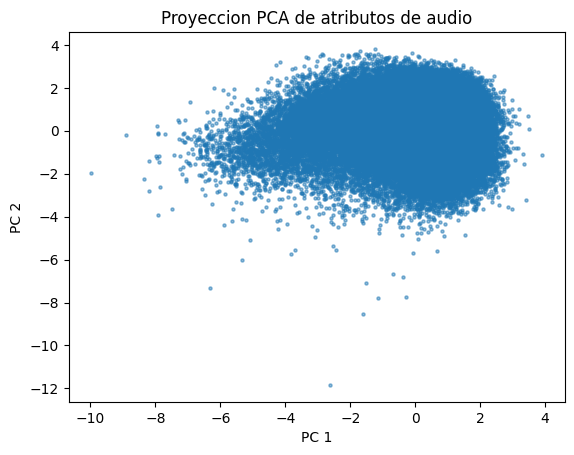

In [3]:
#Eleccion de columnas, solo las que tienen datos numericos
audio_features = [
    'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature'
]

X = music_df[audio_features]

# Escalamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA a 2 componentes para visualizacion 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Graficamos
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, alpha=0.5)
plt.title('Proyeccion PCA de atributos de audio')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


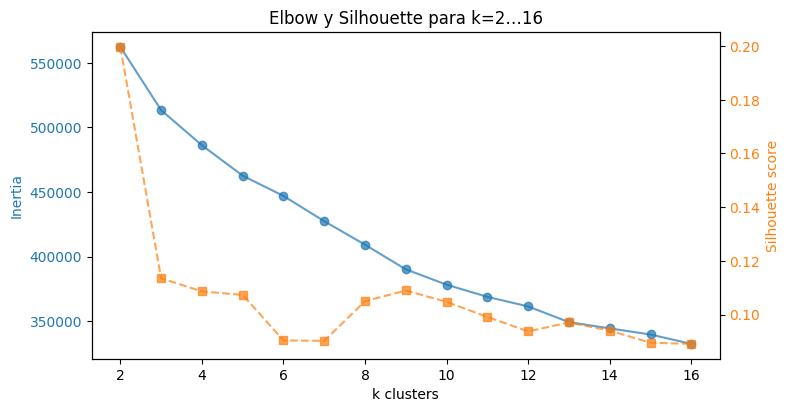

In [ ]:
from sklearn.metrics import silhouette_score
#Definicion de rango de k para el algoritmo KMeans
ks = range(2, 17)
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

# Grafica
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(ks, inertias, 'o-', label='Inertia (elbow)', alpha=0.7)
ax1.set_xlabel('k clusters')
ax1.set_ylabel('Inertia', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx()
ax2.plot(ks, sil_scores, 's--', label='Silhouette', color='C1', alpha=0.7)
ax2.set_ylabel('Silhouette score', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

fig.tight_layout()
plt.title('Elbow y Silhouette para k=2…16')
plt.show()


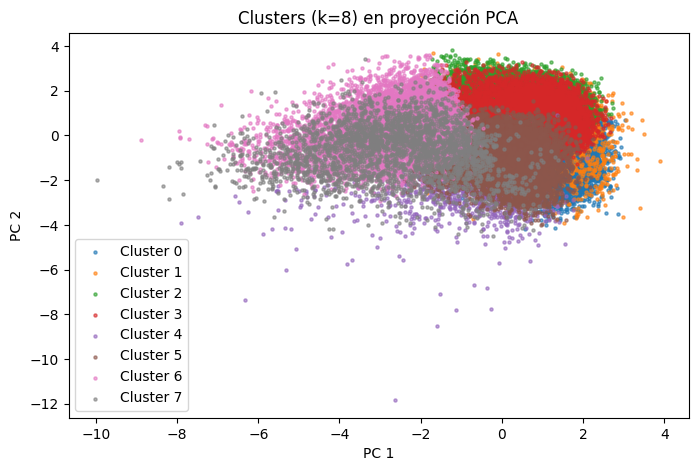

In [5]:
#K-Means con k=8 y proyeccion PCA coloreada por cluster
k_opt = 8
kmeans = KMeans(n_clusters=k_opt, random_state=42).fit(X_scaled)
labels = kmeans.labels_

music_df['cluster'] = labels

# Visualizacion en el espacio PCA
plt.figure(figsize=(8,5))
for cid in range(k_opt):
    mask = (labels == cid)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                s=5, alpha=0.6, label=f'Cluster {cid}')
plt.legend(loc='best')
plt.title(f'Clusters (k={k_opt}) en proyección PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [6]:
# Muestreo
for cid in range(k_opt):
    print(f"\n=== Cluster {cid} ===")
    display(
        music_df[music_df['cluster']==cid]
          [['name','artist']]
          .sample(6, random_state=42)
    )



=== Cluster 0 ===


,name,artist
46476,Good Morning Night,Bad Astronaut
22262,One Good Reason,Celldweller
13739,Excellent Choice,The Horrors
8028,And All Things Will End,Avenged Sevenfold
20131,We Are The Involuntary,Underoath
35722,Dark Reflections,Candlemass



=== Cluster 1 ===


,name,artist
30184,Natty Dread,Bob Marley & The Wailers
40414,Your Mantel Disguised As A Psychic Sasquatch,The Locust
14259,A Milli,Lil' Wayne
14649,Public Service Announcement,Eminem
39725,Long Way to Go,Gwen Stefani
20060,Cutsman,HORSE the band



=== Cluster 2 ===


,name,artist
31089,Softly,Lamb
49781,Kopfkino,Letzte Instanz
29523,Final Shakedown,Groove Armada
32183,Let's Reggae All Night,Cansei de Ser Sexy
31922,Don't Make Fun Of Daddy's Voice,Morrissey
3053,New Life,Depeche Mode



=== Cluster 3 ===


,name,artist
3268,Tous les mêmes,Stromae
17742,Little Dreamer,Van Halen
46366,Warrior Poet,Tomorrows Bad Seeds
49930,Black Rose Withered,Kiuas
44421,For The Last Time,Rory Gallagher
37103,Missing U,Robyn



=== Cluster 4 ===


,name,artist
9924,Askim,Kamasi Washington
35842,Stonesphere,Bongzilla
44460,Out to Lunch,Eric Dolphy
29845,Racing in the Street,Bruce Springsteen
33320,Natural Beauty,Neil Young
14183,Like Herod,Mogwai



=== Cluster 5 ===


,name,artist
46919,Brand New Dub,Roots Manuva
11978,Bucephalus Bouncing Ball,Aphex Twin
48858,Regret (Combichrist Remix),Icon of Coil
45643,Lila,Vas
49153,D'ror Yikra,Oi Va Voi
29344,Mekong Delta,Prometheus



=== Cluster 6 ===


,name,artist
35249,Headstone,Defeater
38216,The Last Beat Of My Heart,Siouxsie and the Banshees
39538,By the Sea,Suede
36765,Ol' Man River,Django Reinhardt
45741,Layers of Tranquility,Karunesh
10722,4 + 20,"Crosby, Stills, Nash & Young"



=== Cluster 7 ===


,name,artist
9274,Donna Lee,Jaco Pastorius
40145,Battle with the Red Queen,Chris Vrenna
21612,La Donna e Mobile,Giuseppe Verdi
21064,Don't Take Your Love Away,Avant
21922,Unbound,Jeremy Soule
8773,You Don't Know Me,Michael Bublé


In [7]:
#Etiquetado "correcto" de clusters
cluster_to_genre = {
    0: 'Rock',
    1: 'Hip-Hop',
    2: 'Alternative',
    3: 'Pop',
    4: 'Jazz',
    5: 'Electronic',
    6: 'Country',
    7: 'Classical'
}

music_df['genre_label'] = music_df['cluster'].map(cluster_to_genre)
print(sorted(music_df['cluster'].unique()))
print(sorted(cluster_to_genre.keys()))
print("NaN en genre_label:", music_df['genre_label'].isna().sum())



[np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7)]
[0, 1, 2, 3, 4, 5, 6, 7]
NaN en genre_label: 0


In [8]:
#Preparar train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Codificamos las etiquetas de genero como numeros
le = LabelEncoder()
y = le.fit_transform(music_df['genre_label'])

#Division train/test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#Creamos una semilla pequeña etiquetada (5 ejemplos por cluster)
n_initial = 5 * k_opt  # k_opt = 8
X_initial, X_pool, y_initial, y_pool = train_test_split(
    X_train_full, y_train_full,
    train_size=n_initial,
    random_state=42,
    stratify=y_train_full
)

print(f"Tamaño inicial etiquetado: {X_initial.shape[0]}")
print(f"Tamaño pool sin etiquetar: {X_pool.shape[0]}")
print(f"Tamaño conjunto de test: {X_test.shape[0]} ")


Tamaño inicial etiquetado: 40
Tamaño pool sin etiquetar: 40506
Tamaño conjunto de test: 10137 


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

#Entrenamos el modelo con Random Forest con los datos iniciales
model = RandomForestClassifier(random_state=42)
model.fit(X_initial, y_initial)

#Evaluar
y_pred = model.predict(X_test)
initial_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy inicial en test: {initial_acc:.3f}")


Accuracy inicial en test: 0.667


In [11]:
from sklearn.metrics import accuracy_score

# Definimos el numero de iteraciones y el tamaño del batch
accuracies = [initial_acc]
n_queries = 30
batch_size = 10  #Cuantos ejemplos se consultan al “oraculo” por iteracion

#Copias de trabajo para mantener X_pool, y_pool actualizables
X_train = X_initial.copy()
y_train = y_initial.copy()

X_pool_remaining = X_pool.copy()
y_pool_remaining = y_pool.copy()

for i in range(n_queries):
    # 1. Predecir probabilidades sobre el pool
    proba = model.predict_proba(X_pool_remaining)

    # 2. Calcular incertidumbre (1 - probabilidad máxima)
    uncertainty = 1 - np.max(proba, axis=1)

    # 3. Elegir los índices mas inciertos
    query_indices = np.argsort(uncertainty)[-batch_size:]

    # 4. Extraer ejemplos consultados
    X_new = X_pool_remaining[query_indices]
    y_new = y_pool_remaining[query_indices]

    # 5. Añadirlos al entrenamiento
    X_train = np.vstack([X_train, X_new])
    y_train = np.concatenate([y_train, y_new])

    # 6. Eliminar del pool
    X_pool_remaining = np.delete(X_pool_remaining, query_indices, axis=0)
    y_pool_remaining = np.delete(y_pool_remaining, query_indices, axis=0)

    # 7. Reentrenar modelo
    model.fit(X_train, y_train)

    # 8. Evaluar
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


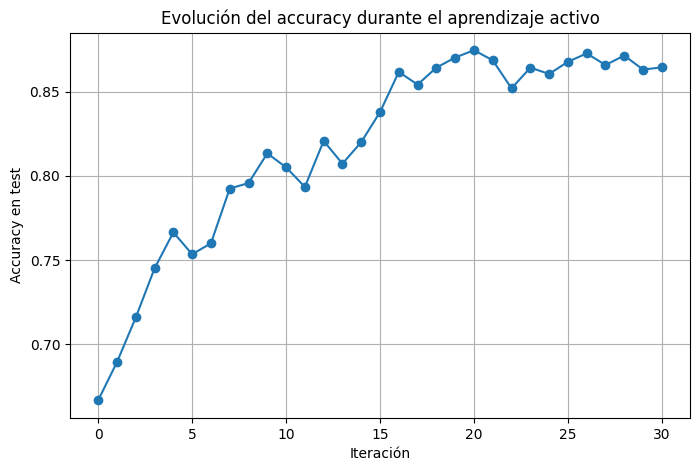

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(len(accuracies)), accuracies, marker='o')
plt.title("Evolución del accuracy durante el aprendizaje activo")
plt.xlabel("Iteración")
plt.ylabel("Accuracy en test")
plt.grid(True)
plt.show()
